In [173]:
import matplotlib.pyplot as plt
import numpy as np
import torch
import train
from mpl_toolkits.mplot3d import Axes3D
import scipy.io as scio

DEVICE = torch.device("cuda:0")

val_input = np.load("./Dataset/val_input.npy")
val_label = np.load("./Dataset/val_label.npy")

epoch = 120

with torch.no_grad():
    checkpoint = torch.load('Experiments/SimpleViT_230303_182546/checkpoints/epoch_{num}.pth'.format(num=epoch), map_location=DEVICE )
    # checkpoint = torch.load('Experiments/SimpleViT_H10L10/checkpoints/epoch_{num}.pth'.format(num=epoch), map_location=DEVICE )
    # checkpoint = torch.load('./checkpoint/experiment_name/ViT/sig4.pth')
    args = checkpoint['args']
    module = train.set_module(args)
    module.load_state_dict(checkpoint['model'])
    module.to(DEVICE)
    module.eval()

sample = np.random.randint(0, 2000)
# sample = 1013
sample = 1042
# sample = 1101
# sample = 276
# sample = 1716
print('sample = ', sample)
test_input = val_input[sample]
test_input = torch.tensor(test_input).unsqueeze(0).to(DEVICE)
test_input = test_input.to(torch.float32)

out_decay, test_out, test_lambda = module(test_input)
test_out = test_out.cpu().detach().numpy()
print('lambda = ', test_lambda)

# scio.savemat("./input.mat", {"input":val_input[sample]})
# scio.savemat("./label.mat", {"label":val_label[sample]})
# scio.savemat("./result.mat", {"result":test_out[0, :, :]})

sample =  1042
lambda =  0.025


/mnt/DATA1/chenbo/miniconda3/envs/ChineseNMT/lib/python3.7/site-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  after removing the cwd from sys.path.


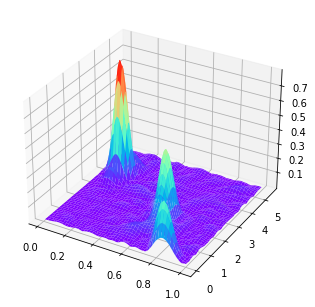

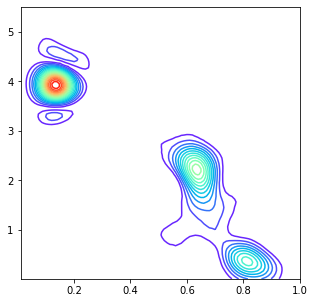

/mnt/DATA1/chenbo/miniconda3/envs/ChineseNMT/lib/python3.7/site-packages/ipykernel_launcher.py:20: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.


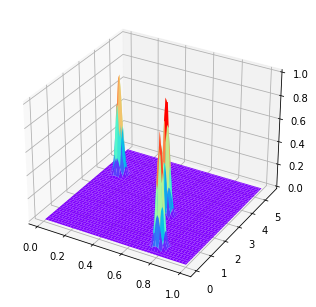

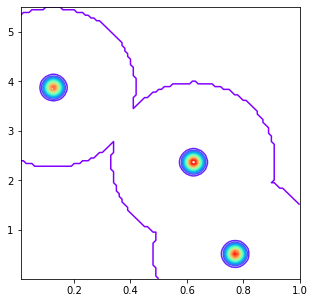

In [174]:
label_dim = 100

figure = plt.figure(0)
axes = Axes3D(figure)

X = np.linspace(0.01, 1, 100)
Y = np.linspace(0.0154, 5.5, 100)

X,Y = np.meshgrid(X, Y)
Z = test_out[0].reshape(label_dim, label_dim)
axes.plot_surface(X,Y,Z,cmap='rainbow')
plt.show()

plt.figure(1, figsize=(5, 5))
# Z[Z<0.01] = 0
plt.contour(X, Y, Z, 20, cmap='rainbow')
plt.show()

figure = plt.figure(2)
axes = Axes3D(figure)

X = np.linspace(0.01, 1, 100)
Y = np.linspace(0.0154, 5.5, 100)

X,Y = np.meshgrid(X, Y)
Z = val_label[sample]
axes.plot_surface(X,Y,Z,cmap='rainbow')

plt.figure(3, figsize=(5, 5))
plt.contour(X, Y, Z, 20, cmap='rainbow')
plt.show()